# EPL 2018/19 Top 6

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import display

pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Import data

# source: https://datahub.io/collections/football

filename = 'https://datahub.io/sports-data/english-premier-league/r/season-1819.csv'

df = pd.read_csv(filename)

In [3]:
#Manipulate dataset

#Format Date variable
df.Date = pd.to_datetime(df.Date)

#Add underscore to team names
df[['HomeTeam','AwayTeam']] = df[['HomeTeam','AwayTeam']].replace(' ', '_', regex=True)

df.dtypes.head()
df.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
375,2019-05-12,Liverpool,Wolves,2,0,H,1,0,H,M Atkinson,13,7,5,2,3,11,4,1,0,2,0,0
376,2019-05-12,Man_United,Cardiff,0,2,A,0,1,A,J Moss,26,13,10,4,9,6,11,2,3,3,0,0
377,2019-05-12,Southampton,Huddersfield,1,1,D,1,0,H,L Probert,10,10,3,3,8,6,4,3,0,1,0,0
378,2019-05-12,Tottenham,Everton,2,2,D,1,0,H,A Marriner,11,17,3,9,10,13,7,4,0,2,0,0
379,2019-05-12,Watford,West_Ham,1,4,A,0,2,A,C Kavanagh,17,16,8,9,10,10,7,2,1,0,1,0


In [4]:
#Get unique list of teams
teams = df.HomeTeam.unique().tolist()

#Subset for teams of interest
teams_select = ['Man_United', 'Arsenal', 'Liverpool', 'Chelsea', 'Tottenham', 'Man_City']

# teams_bottom = ['Fulham', 'Huddersfield',  'Southampton', 'Cardiff', 'Brighton', 'Burnley']

In [5]:
#Calculate points gained for each team

df_all = pd.DataFrame()

for team in teams_select:

    #Subset dataset for specific team
    df_temp = df[(df.HomeTeam == team) | (df.AwayTeam == team)]
    
    #Reset index
    df_temp.reset_index(inplace=True)

    #Function to get incremental and cumulative points gained
    conditions = [
        (df_temp['FTR'] == 'H') & (df_temp['HomeTeam'] == team),
        (df_temp['FTR'] == 'A') & (df_temp['AwayTeam'] == team),
        (df_temp['FTR'] == 'D'),
        (df_temp['FTR'] == 'H') & (df_temp['AwayTeam'] == team),
        (df_temp['FTR'] == 'A') & (df_temp['HomeTeam'] == team),]
    choices = [3, 3, 1, 0, 0]
    df_temp['points_gained'] = np.select(conditions, choices, default=9)

    #Cumulate points
    df_temp[team] = df_temp['points_gained'].cumsum()

    # Append
    df_all[team] = df_temp[team]
    

#Add Matchday
    matchday = [1+games for games in range(len(df_temp))]
    df_all['Matchday'] = matchday

In [6]:
df_all.head()

,Man_United,Matchday,Arsenal,Liverpool,Chelsea,Tottenham,Man_City
0,3,1,0,3,3,3,3
1,3,2,0,6,6,6,6
2,3,3,3,9,9,9,7
3,6,4,6,12,12,9,10
4,9,5,9,15,15,9,13


# Graph

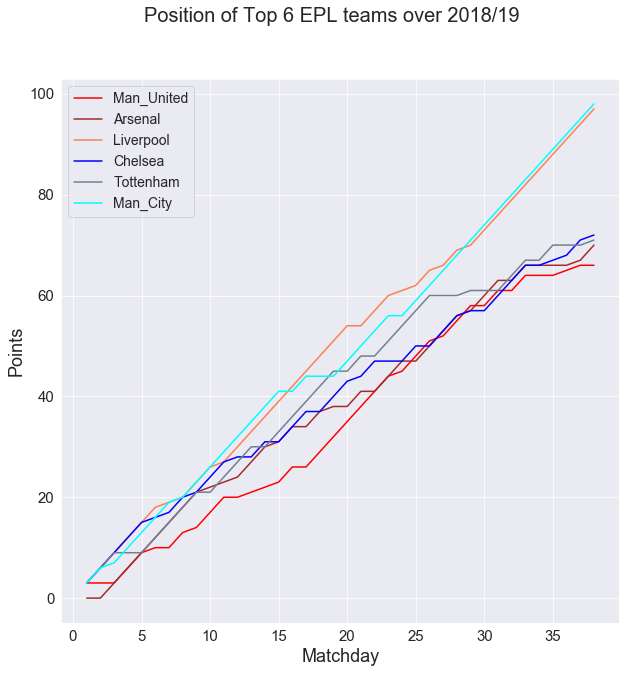

In [7]:
sns.set_style("darkgrid")
sns.set_palette('muted')

fig=plt.figure(figsize=(10, 10))
plt.tick_params(axis='both', which='major', labelsize=15)

plt.plot('Matchday', 'Man_United',data=df_all, color='red');
plt.plot('Matchday', 'Arsenal',data=df_all, color='brown');
plt.plot('Matchday', 'Liverpool',data=df_all, color='coral');
plt.plot('Matchday', 'Chelsea',data=df_all, color='blue');
plt.plot('Matchday', 'Tottenham',data=df_all, color='slategrey');
plt.plot('Matchday', 'Man_City',data=df_all, color='aqua');

plt.legend(fontsize=14)

fig.suptitle('Position of Top 6 EPL teams over 2018/19', fontsize=20);
plt.xlabel('Matchday', fontsize=18);
plt.ylabel('Points', fontsize=18);

plt.savefig('graph.png');

Further investigations:
- How long each team stayed in each position OR highest position reached
- Bottom 6